In [210]:
#Read in data and just keep the first two classes so as to create a binary problem
%matplotlib inline
import numpy as np
from sklearn.datasets import load_wine
data, labels = load_wine(True)
data = data[:(59 + 71)]
labels = np.expand_dims(labels[:(59 + 71)], axis = 1)

# Logistic Regression

In [446]:
def logit(prediction):
    return 1.0 / (1 + np.exp(-prediction))
def CalculateLossAcc(X, y, w, b):
    prediction = logit(X.dot(w.T) + b)
    loss = 0
    for i in range(len(y)):
        if y[i] == 0:
            loss -= np.log(1-prediction[i])
        else:
            loss -= np.log(prediction[i])
    loss = 1.0 * loss / len(X)
    prediction[prediction > 0.5] = 1
    prediction[prediction <= 0.5] = 0
    acc = 1.0 * np.sum([a == b for (a, b) in zip(prediction, y)]) / len(y)
    return loss, acc

In [451]:
from sklearn import linear_model
losslogistic = np.zeros(3000)
acclogistic = np.zeros(3000)
for i in range(3000):
    logistic = linear_model.LogisticRegression(C = 1e10, max_iter = i, solver = 'sag')
    logistic.fit(data,labels)
    weight = logistic.coef_
    bias = logistic.intercept_
    iteration = logistic.n_iter_
    loss, acc = CalculateLossAcc(data, labels, weight, bias)
    losslogistic[i] = loss[0]
    acclogistic[i] = acc

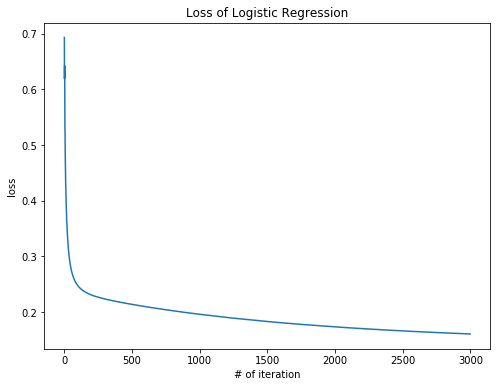

In [452]:
import matplotlib
import matplotlib.pyplot as plt

x = [i for i in range(len(losslogistic))]
plt.figure(figsize = (8,6))
plt.plot(x, losslogistic)
plt.xlabel('# of iteration')
plt.ylabel('loss')
plt.title('Loss of Logistic Regression')
plt.show()

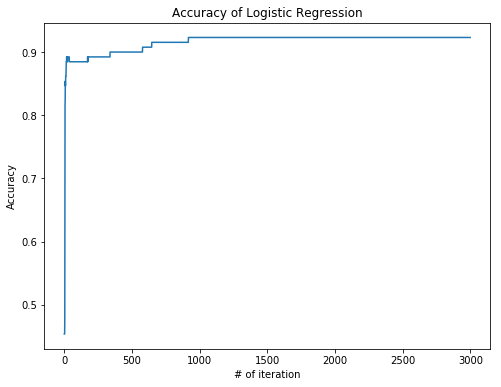

In [453]:
x = [i for i in range(len(acclogistic))]
plt.figure(figsize = (8,6))
plt.plot(x, acclogistic)
plt.xlabel('# of iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy of Logistic Regression')
plt.show()

# My Coordinate Descent Method

In [414]:
import numpy as np
from sklearn import linear_model
class LogisticRegressionWithGoordinateDescent():
    def __init__(self, X, y, lr = 1e-3, maxIter = 1000, random = False):
        self.X = self.addBias(X)
        self.y = y
        self.lr = lr
        self.w = np.zeros((len(self.X[0]),1))
        self.maxIter = maxIter
        self.random = random
        self.loss = []
        self.acc = []
        
    def addBias(self, X):
        return np.insert(X, 0, 1, axis = 1)
    
    def logit(self,prediction):
        return 1.0 / (1 + np.exp(-prediction))
    
    def findIndex(self, derE):
        if self.random:
            return np.random.randint(0, 13)
        else:
            return np.argmax(np.abs(derE))
    
    def CalculateLossAcc(self):
        prediction = self.logit(self.X.dot(self.w))
        loss = 0
        for i in range(len(self.y)):
            if self.y[i] == 0:
                loss -= np.log(1 - prediction[i])
            else:
                loss -= np.log(prediction[i])
        loss = 1.0 * loss / len(self.y)
        prediction[prediction > 0.5] = 1
        prediction[prediction <= 0.5] = 0
        acc = 1.0 * np.sum([a == b for (a, b) in zip(prediction, self.y)]) / len(self.y)
        return loss, acc
    
    def fit(self):
        it = 0
        while it < self.maxIter:
            prediction = self.logit(self.X.dot(self.w))
            derE = np.sum((prediction - self.y) * self.X, axis=0) / len(self.X)
            wIndex = self.findIndex(derE)
            self.w[wIndex] = self.w[wIndex] - self.lr * derE[wIndex]
            loss, acc = self.CalculateLossAcc()       
            print 'loss = %8.6f' % loss
            print 'acc = %5.2f' % acc
            self.loss.append(loss)
            self.acc.append(acc)       
            it += 1

In [415]:
cd = LogisticRegressionWithGoordinateDescent(data, labels, lr = 1e-5, maxIter = 3000)

In [416]:
cd.fit()

loss = 0.678354
acc =  0.45
loss = 0.664557
acc =  0.45
loss = 0.662002
acc =  0.45
loss = 0.660368
acc =  0.45
loss = 0.659836
acc =  0.45
loss = 0.657536
acc =  0.45
loss = 0.655343
acc =  0.45
loss = 0.653251
acc =  0.45
loss = 0.651256
acc =  0.45
loss = 0.649355
acc =  0.45
loss = 0.647542
acc =  0.45
loss = 0.645815
acc =  0.45
loss = 0.644169
acc =  0.45
loss = 0.642601
acc =  0.45
loss = 0.641108
acc =  0.45
loss = 0.640838
acc =  0.45
loss = 0.638803
acc =  0.45
loss = 0.636863
acc =  0.45
loss = 0.635013
acc =  0.45
loss = 0.633249
acc =  0.45
loss = 0.631568
acc =  0.45
loss = 0.629967
acc =  0.45
loss = 0.628440
acc =  0.45
loss = 0.626986
acc =  0.45
loss = 0.625601
acc =  0.45
loss = 0.625297
acc =  0.45
loss = 0.623363
acc =  0.45
loss = 0.621519
acc =  0.45
loss = 0.619760
acc =  0.45
loss = 0.618084
acc =  0.47
loss = 0.616486
acc =  0.48
loss = 0.614963
acc =  0.49
loss = 0.613511
acc =  0.52
loss = 0.612128
acc =  0.52
loss = 0.610811
acc =  0.52
loss = 0.610530
acc 

loss = 0.398348
acc =  0.87
loss = 0.397947
acc =  0.87
loss = 0.397562
acc =  0.87
loss = 0.397191
acc =  0.87
loss = 0.396834
acc =  0.88
loss = 0.396491
acc =  0.88
loss = 0.396161
acc =  0.88
loss = 0.395844
acc =  0.88
loss = 0.395707
acc =  0.87
loss = 0.395304
acc =  0.87
loss = 0.394917
acc =  0.87
loss = 0.394545
acc =  0.87
loss = 0.394186
acc =  0.88
loss = 0.393842
acc =  0.88
loss = 0.393510
acc =  0.88
loss = 0.393192
acc =  0.88
loss = 0.392885
acc =  0.88
loss = 0.392750
acc =  0.87
loss = 0.392361
acc =  0.87
loss = 0.391987
acc =  0.87
loss = 0.391628
acc =  0.88
loss = 0.391281
acc =  0.88
loss = 0.390948
acc =  0.88
loss = 0.390628
acc =  0.88
loss = 0.390319
acc =  0.88
loss = 0.390023
acc =  0.88
loss = 0.389891
acc =  0.87
loss = 0.389515
acc =  0.87
loss = 0.389154
acc =  0.88
loss = 0.388806
acc =  0.88
loss = 0.388471
acc =  0.88
loss = 0.388149
acc =  0.88
loss = 0.387839
acc =  0.88
loss = 0.387541
acc =  0.88
loss = 0.387254
acc =  0.88
loss = 0.387124
acc 

acc =  0.89
loss = 0.329223
acc =  0.88
loss = 0.329078
acc =  0.88
loss = 0.328938
acc =  0.88
loss = 0.328802
acc =  0.89
loss = 0.328670
acc =  0.89
loss = 0.328543
acc =  0.89
loss = 0.328420
acc =  0.89
loss = 0.328300
acc =  0.89
loss = 0.328184
acc =  0.89
loss = 0.328116
acc =  0.88
loss = 0.327974
acc =  0.88
loss = 0.327837
acc =  0.89
loss = 0.327705
acc =  0.89
loss = 0.327576
acc =  0.89
loss = 0.327452
acc =  0.89
loss = 0.327331
acc =  0.89
loss = 0.327214
acc =  0.89
loss = 0.327101
acc =  0.89
loss = 0.327034
acc =  0.88
loss = 0.326895
acc =  0.88
loss = 0.326761
acc =  0.89
loss = 0.326632
acc =  0.89
loss = 0.326506
acc =  0.89
loss = 0.326384
acc =  0.89
loss = 0.326266
acc =  0.89
loss = 0.326152
acc =  0.89
loss = 0.326041
acc =  0.89
loss = 0.325975
acc =  0.88
loss = 0.325840
acc =  0.89
loss = 0.325709
acc =  0.89
loss = 0.325582
acc =  0.89
loss = 0.325459
acc =  0.89
loss = 0.325340
acc =  0.89
loss = 0.325224
acc =  0.89
loss = 0.325112
acc =  0.89
loss = 0

loss = 0.299532
acc =  0.88
loss = 0.299466
acc =  0.88
loss = 0.299402
acc =  0.88
loss = 0.299339
acc =  0.88
loss = 0.299278
acc =  0.88
loss = 0.299218
acc =  0.88
loss = 0.299161
acc =  0.88
loss = 0.299104
acc =  0.88
loss = 0.299066
acc =  0.88
loss = 0.298999
acc =  0.88
loss = 0.298934
acc =  0.88
loss = 0.298871
acc =  0.88
loss = 0.298809
acc =  0.88
loss = 0.298749
acc =  0.88
loss = 0.298690
acc =  0.88
loss = 0.298634
acc =  0.88
loss = 0.298578
acc =  0.88
loss = 0.298541
acc =  0.88
loss = 0.298475
acc =  0.88
loss = 0.298411
acc =  0.88
loss = 0.298348
acc =  0.88
loss = 0.298287
acc =  0.88
loss = 0.298228
acc =  0.88
loss = 0.298171
acc =  0.88
loss = 0.298115
acc =  0.88
loss = 0.298061
acc =  0.88
loss = 0.298024
acc =  0.88
loss = 0.297959
acc =  0.88
loss = 0.297896
acc =  0.88
loss = 0.297834
acc =  0.88
loss = 0.297775
acc =  0.88
loss = 0.297717
acc =  0.88
loss = 0.297660
acc =  0.88
loss = 0.297605
acc =  0.88
loss = 0.297552
acc =  0.88
loss = 0.297515
acc 

loss = 0.283040
acc =  0.88
loss = 0.283007
acc =  0.88
loss = 0.282976
acc =  0.88
loss = 0.282945
acc =  0.88
loss = 0.282922
acc =  0.88
loss = 0.282886
acc =  0.88
loss = 0.282851
acc =  0.88
loss = 0.282816
acc =  0.88
loss = 0.282783
acc =  0.88
loss = 0.282750
acc =  0.88
loss = 0.282718
acc =  0.88
loss = 0.282686
acc =  0.88
loss = 0.282656
acc =  0.88
loss = 0.282634
acc =  0.88
loss = 0.282598
acc =  0.88
loss = 0.282563
acc =  0.88
loss = 0.282529
acc =  0.88
loss = 0.282496
acc =  0.88
loss = 0.282463
acc =  0.88
loss = 0.282432
acc =  0.88
loss = 0.282401
acc =  0.88
loss = 0.282371
acc =  0.88
loss = 0.282349
acc =  0.88
loss = 0.282313
acc =  0.88
loss = 0.282279
acc =  0.88
loss = 0.282245
acc =  0.88
loss = 0.282213
acc =  0.88
loss = 0.282181
acc =  0.88
loss = 0.282149
acc =  0.88
loss = 0.282119
acc =  0.88
loss = 0.282089
acc =  0.88
loss = 0.282067
acc =  0.88
loss = 0.282033
acc =  0.88
loss = 0.281999
acc =  0.88
loss = 0.281965
acc =  0.88
loss = 0.281933
acc 

loss = 0.273355
acc =  0.88
loss = 0.273334
acc =  0.88
loss = 0.273314
acc =  0.88
loss = 0.273294
acc =  0.88
loss = 0.273274
acc =  0.88
loss = 0.273255
acc =  0.88
loss = 0.273237
acc =  0.88
loss = 0.273223
acc =  0.88
loss = 0.273201
acc =  0.88
loss = 0.273180
acc =  0.88
loss = 0.273160
acc =  0.88
loss = 0.273140
acc =  0.88
loss = 0.273120
acc =  0.88
loss = 0.273101
acc =  0.88
loss = 0.273082
acc =  0.88
loss = 0.273064
acc =  0.88
loss = 0.273050
acc =  0.88
loss = 0.273028
acc =  0.88
loss = 0.273008
acc =  0.88
loss = 0.272987
acc =  0.88
loss = 0.272967
acc =  0.88
loss = 0.272948
acc =  0.88
loss = 0.272929
acc =  0.88
loss = 0.272911
acc =  0.88
loss = 0.272892
acc =  0.88
loss = 0.272878
acc =  0.88
loss = 0.272857
acc =  0.88
loss = 0.272837
acc =  0.88
loss = 0.272817
acc =  0.88
loss = 0.272797
acc =  0.88
loss = 0.272778
acc =  0.88
loss = 0.272759
acc =  0.88
loss = 0.272741
acc =  0.88
loss = 0.272723
acc =  0.88
loss = 0.272709
acc =  0.88
loss = 0.272688
acc 

loss = 0.266891
acc =  0.88
loss = 0.266879
acc =  0.88
loss = 0.266868
acc =  0.88
loss = 0.266858
acc =  0.88
loss = 0.266845
acc =  0.88
loss = 0.266832
acc =  0.88
loss = 0.266819
acc =  0.88
loss = 0.266806
acc =  0.88
loss = 0.266794
acc =  0.88
loss = 0.266782
acc =  0.88
loss = 0.266770
acc =  0.88
loss = 0.266759
acc =  0.88
loss = 0.266750
acc =  0.88
loss = 0.266736
acc =  0.88
loss = 0.266723
acc =  0.88
loss = 0.266711
acc =  0.88
loss = 0.266698
acc =  0.88
loss = 0.266686
acc =  0.88
loss = 0.266674
acc =  0.88
loss = 0.266662
acc =  0.88
loss = 0.266651
acc =  0.88
loss = 0.266642
acc =  0.88
loss = 0.266629
acc =  0.88
loss = 0.266616
acc =  0.88
loss = 0.266603
acc =  0.88
loss = 0.266591
acc =  0.88
loss = 0.266579
acc =  0.88
loss = 0.266567
acc =  0.88
loss = 0.266555
acc =  0.88
loss = 0.266544
acc =  0.88
loss = 0.266535
acc =  0.88
loss = 0.266522
acc =  0.88
loss = 0.266509
acc =  0.88
loss = 0.266497
acc =  0.88
loss = 0.266485
acc =  0.88
loss = 0.266473
acc 

acc =  0.88
loss = 0.263079
acc =  0.88
loss = 0.263070
acc =  0.88
loss = 0.263062
acc =  0.88
loss = 0.263054
acc =  0.88
loss = 0.263046
acc =  0.88
loss = 0.263039
acc =  0.88
loss = 0.263030
acc =  0.88
loss = 0.263021
acc =  0.88
loss = 0.263012
acc =  0.88
loss = 0.263004
acc =  0.88
loss = 0.262995
acc =  0.88
loss = 0.262987
acc =  0.88
loss = 0.262979
acc =  0.88
loss = 0.262971
acc =  0.88
loss = 0.262964
acc =  0.88
loss = 0.262955
acc =  0.88
loss = 0.262946
acc =  0.88
loss = 0.262938
acc =  0.88
loss = 0.262929
acc =  0.88
loss = 0.262921
acc =  0.88
loss = 0.262912
acc =  0.88
loss = 0.262904
acc =  0.88
loss = 0.262899
acc =  0.88
loss = 0.262890
acc =  0.88
loss = 0.262881
acc =  0.88
loss = 0.262872
acc =  0.88
loss = 0.262863
acc =  0.88
loss = 0.262855
acc =  0.88
loss = 0.262847
acc =  0.88
loss = 0.262839
acc =  0.88
loss = 0.262831
acc =  0.88
loss = 0.262825
acc =  0.88
loss = 0.262816
acc =  0.88
loss = 0.262807
acc =  0.88
loss = 0.262798
acc =  0.88
loss = 0

loss = 0.260110
acc =  0.88
loss = 0.260104
acc =  0.88
loss = 0.260098
acc =  0.88
loss = 0.260092
acc =  0.88
loss = 0.260087
acc =  0.88
loss = 0.260081
acc =  0.88
loss = 0.260074
acc =  0.88
loss = 0.260068
acc =  0.88
loss = 0.260062
acc =  0.88
loss = 0.260055
acc =  0.88
loss = 0.260049
acc =  0.88
loss = 0.260043
acc =  0.88
loss = 0.260037
acc =  0.88
loss = 0.260031
acc =  0.88
loss = 0.260024
acc =  0.88
loss = 0.260018
acc =  0.88
loss = 0.260012
acc =  0.88
loss = 0.260006
acc =  0.88
loss = 0.260000
acc =  0.88
loss = 0.259994
acc =  0.88
loss = 0.259987
acc =  0.88
loss = 0.259981
acc =  0.88
loss = 0.259975
acc =  0.88
loss = 0.259969
acc =  0.88


In [417]:
print (len(cd.loss))
print max(cd.acc)

3000
0.892307692308


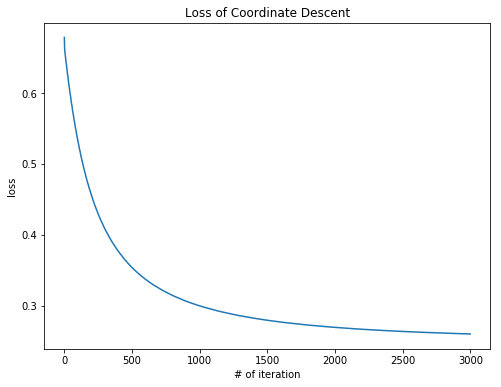

In [418]:
x = [i for i in range(len(cd.loss))]
plt.figure(figsize = (8,6))
plt.plot(x, cd.loss)
plt.xlabel('# of iteration')
plt.ylabel('loss')
plt.title('Loss of Coordinate Descent')
plt.show()

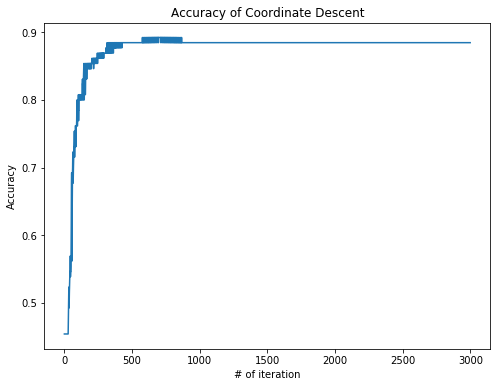

In [459]:
x = [i for i in range(len(cd.acc))]
plt.figure(figsize = (8,6))
plt.plot(x, cd.acc)
plt.xlabel('# of iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy of Coordinate Descent')
plt.show()

# Uniformly Random Coordinate Descent

In [460]:
cd1 = LogisticRegressionWithGoordinateDescent(data, labels, lr = 1e-4, maxIter = 3000, random = True)

In [461]:
cd1.fit()

loss = 0.693147
acc =  0.55
loss = 0.693147
acc =  0.49
loss = 0.692872
acc =  0.55
loss = 0.692872
acc =  0.55
loss = 0.692872
acc =  0.55
loss = 0.692854
acc =  0.55
loss = 0.692854
acc =  0.55
loss = 0.692849
acc =  0.55
loss = 0.692832
acc =  0.55
loss = 0.692831
acc =  0.55
loss = 0.692831
acc =  0.55
loss = 0.692830
acc =  0.55
loss = 0.692830
acc =  0.55
loss = 0.692830
acc =  0.55
loss = 0.692830
acc =  0.55
loss = 0.692829
acc =  0.55
loss = 0.692824
acc =  0.55
loss = 0.692824
acc =  0.55
loss = 0.692824
acc =  0.55
loss = 0.692824
acc =  0.55
loss = 0.692823
acc =  0.55
loss = 0.692823
acc =  0.55
loss = 0.692823
acc =  0.55
loss = 0.692818
acc =  0.55
loss = 0.692818
acc =  0.55
loss = 0.692817
acc =  0.55
loss = 0.692817
acc =  0.55
loss = 0.692817
acc =  0.55
loss = 0.692817
acc =  0.55
loss = 0.692816
acc =  0.55
loss = 0.692816
acc =  0.55
loss = 0.692811
acc =  0.55
loss = 0.692810
acc =  0.55
loss = 0.692810
acc =  0.55
loss = 0.692542
acc =  0.55
loss = 0.692279
acc 

loss = 0.687152
acc =  0.55
loss = 0.687152
acc =  0.55
loss = 0.687152
acc =  0.55
loss = 0.687150
acc =  0.55
loss = 0.687150
acc =  0.55
loss = 0.687127
acc =  0.55
loss = 0.687126
acc =  0.55
loss = 0.687124
acc =  0.55
loss = 0.686949
acc =  0.55
loss = 0.686778
acc =  0.55
loss = 0.686778
acc =  0.55
loss = 0.686776
acc =  0.55
loss = 0.686776
acc =  0.55
loss = 0.686776
acc =  0.55
loss = 0.686775
acc =  0.55
loss = 0.686775
acc =  0.55
loss = 0.686775
acc =  0.55
loss = 0.686775
acc =  0.55
loss = 0.686775
acc =  0.55
loss = 0.686775
acc =  0.55
loss = 0.686775
acc =  0.55
loss = 0.686751
acc =  0.55
loss = 0.686751
acc =  0.55
loss = 0.686749
acc =  0.55
loss = 0.686748
acc =  0.55
loss = 0.686725
acc =  0.55
loss = 0.686725
acc =  0.55
loss = 0.686725
acc =  0.55
loss = 0.686725
acc =  0.55
loss = 0.686725
acc =  0.55
loss = 0.686724
acc =  0.55
loss = 0.686724
acc =  0.55
loss = 0.686723
acc =  0.55
loss = 0.686551
acc =  0.55
loss = 0.686382
acc =  0.55
loss = 0.686382
acc 

loss = 0.682218
acc =  0.55
loss = 0.682217
acc =  0.55
loss = 0.682217
acc =  0.55
loss = 0.682217
acc =  0.55
loss = 0.682217
acc =  0.55
loss = 0.682217
acc =  0.55
loss = 0.682216
acc =  0.55
loss = 0.682216
acc =  0.55
loss = 0.682216
acc =  0.55
loss = 0.682214
acc =  0.55
loss = 0.682214
acc =  0.55
loss = 0.682214
acc =  0.55
loss = 0.682191
acc =  0.55
loss = 0.682189
acc =  0.55
loss = 0.682189
acc =  0.55
loss = 0.682189
acc =  0.55
loss = 0.682189
acc =  0.55
loss = 0.682020
acc =  0.55
loss = 0.682019
acc =  0.55
loss = 0.682018
acc =  0.55
loss = 0.682018
acc =  0.55
loss = 0.682018
acc =  0.55
loss = 0.682017
acc =  0.55
loss = 0.681994
acc =  0.55
loss = 0.681994
acc =  0.55
loss = 0.681994
acc =  0.55
loss = 0.681994
acc =  0.55
loss = 0.681994
acc =  0.55
loss = 0.681994
acc =  0.55
loss = 0.681994
acc =  0.55
loss = 0.681994
acc =  0.55
loss = 0.681994
acc =  0.55
loss = 0.681994
acc =  0.55
loss = 0.681971
acc =  0.55
loss = 0.681948
acc =  0.55
loss = 0.681948
acc 

loss = 0.676274
acc =  0.56
loss = 0.676274
acc =  0.56
loss = 0.676251
acc =  0.56
loss = 0.676251
acc =  0.56
loss = 0.676250
acc =  0.56
loss = 0.676250
acc =  0.56
loss = 0.676227
acc =  0.56
loss = 0.676227
acc =  0.56
loss = 0.676069
acc =  0.57
loss = 0.676069
acc =  0.57
loss = 0.676069
acc =  0.57
loss = 0.676066
acc =  0.57
loss = 0.676043
acc =  0.57
loss = 0.676019
acc =  0.57
loss = 0.676019
acc =  0.57
loss = 0.676019
acc =  0.57
loss = 0.676019
acc =  0.57
loss = 0.676019
acc =  0.57
loss = 0.676019
acc =  0.57
loss = 0.676019
acc =  0.57
loss = 0.676019
acc =  0.57
loss = 0.676015
acc =  0.57
loss = 0.676013
acc =  0.57
loss = 0.676013
acc =  0.57
loss = 0.675990
acc =  0.58
loss = 0.675990
acc =  0.58
loss = 0.675990
acc =  0.58
loss = 0.675990
acc =  0.58
loss = 0.675990
acc =  0.58
loss = 0.675989
acc =  0.58
loss = 0.675987
acc =  0.58
loss = 0.675987
acc =  0.58
loss = 0.675987
acc =  0.58
loss = 0.675986
acc =  0.58
loss = 0.675986
acc =  0.58
loss = 0.675986
acc 

loss = 0.671410
acc =  0.59
loss = 0.671387
acc =  0.59
loss = 0.671387
acc =  0.59
loss = 0.671387
acc =  0.59
loss = 0.671364
acc =  0.59
loss = 0.671362
acc =  0.59
loss = 0.671362
acc =  0.59
loss = 0.671362
acc =  0.59
loss = 0.671362
acc =  0.59
loss = 0.671360
acc =  0.59
loss = 0.671337
acc =  0.60
loss = 0.671335
acc =  0.60
loss = 0.671334
acc =  0.61
loss = 0.671334
acc =  0.61
loss = 0.671334
acc =  0.61
loss = 0.671334
acc =  0.61
loss = 0.671332
acc =  0.61
loss = 0.671332
acc =  0.61
loss = 0.671332
acc =  0.61
loss = 0.671332
acc =  0.61
loss = 0.671329
acc =  0.61
loss = 0.671329
acc =  0.61
loss = 0.671307
acc =  0.61
loss = 0.671306
acc =  0.61
loss = 0.671306
acc =  0.61
loss = 0.671306
acc =  0.61
loss = 0.671306
acc =  0.61
loss = 0.671148
acc =  0.59
loss = 0.671148
acc =  0.59
loss = 0.671146
acc =  0.59
loss = 0.671143
acc =  0.59
loss = 0.671143
acc =  0.59
loss = 0.671143
acc =  0.59
loss = 0.671143
acc =  0.59
loss = 0.671143
acc =  0.59
loss = 0.670988
acc 

loss = 0.666897
acc =  0.65
loss = 0.666897
acc =  0.65
loss = 0.666897
acc =  0.65
loss = 0.666897
acc =  0.65
loss = 0.666896
acc =  0.65
loss = 0.666896
acc =  0.65
loss = 0.666874
acc =  0.65
loss = 0.666874
acc =  0.65
loss = 0.666873
acc =  0.65
loss = 0.666873
acc =  0.65
loss = 0.666873
acc =  0.65
loss = 0.666873
acc =  0.65
loss = 0.666873
acc =  0.65
loss = 0.666873
acc =  0.65
loss = 0.666873
acc =  0.65
loss = 0.666873
acc =  0.65
loss = 0.666850
acc =  0.65
loss = 0.666850
acc =  0.65
loss = 0.666850
acc =  0.65
loss = 0.666827
acc =  0.66
loss = 0.666827
acc =  0.66
loss = 0.666827
acc =  0.66
loss = 0.666827
acc =  0.66
loss = 0.666826
acc =  0.66
loss = 0.666826
acc =  0.66
loss = 0.666826
acc =  0.66
loss = 0.666826
acc =  0.66
loss = 0.666826
acc =  0.66
loss = 0.666825
acc =  0.66
loss = 0.666825
acc =  0.66
loss = 0.666825
acc =  0.66
loss = 0.666823
acc =  0.66
loss = 0.666823
acc =  0.66
loss = 0.666823
acc =  0.66
loss = 0.666823
acc =  0.66
loss = 0.666823
acc 

loss = 0.662087
acc =  0.68
loss = 0.662087
acc =  0.68
loss = 0.662087
acc =  0.68
loss = 0.662086
acc =  0.68
loss = 0.662086
acc =  0.68
loss = 0.662086
acc =  0.68
loss = 0.662086
acc =  0.68
loss = 0.662086
acc =  0.68
loss = 0.662086
acc =  0.68
loss = 0.662086
acc =  0.68
loss = 0.662080
acc =  0.69
loss = 0.662080
acc =  0.69
loss = 0.662080
acc =  0.69
loss = 0.662058
acc =  0.70
loss = 0.662058
acc =  0.70
loss = 0.662057
acc =  0.70
loss = 0.662057
acc =  0.70
loss = 0.662057
acc =  0.70
loss = 0.661913
acc =  0.68
loss = 0.661913
acc =  0.68
loss = 0.661913
acc =  0.68
loss = 0.661913
acc =  0.68
loss = 0.661913
acc =  0.68
loss = 0.661913
acc =  0.68
loss = 0.661913
acc =  0.68
loss = 0.661912
acc =  0.68
loss = 0.661912
acc =  0.68
loss = 0.661912
acc =  0.68
loss = 0.661912
acc =  0.68
loss = 0.661912
acc =  0.68
loss = 0.661912
acc =  0.68
loss = 0.661906
acc =  0.70
loss = 0.661906
acc =  0.70
loss = 0.661906
acc =  0.70
loss = 0.661906
acc =  0.70
loss = 0.661906
acc 

loss = 0.657201
acc =  0.72
loss = 0.657200
acc =  0.73
loss = 0.657200
acc =  0.73
loss = 0.657200
acc =  0.73
loss = 0.657200
acc =  0.73
loss = 0.657056
acc =  0.72
loss = 0.657056
acc =  0.72
loss = 0.657055
acc =  0.72
loss = 0.657055
acc =  0.72
loss = 0.657055
acc =  0.72
loss = 0.657055
acc =  0.72
loss = 0.657055
acc =  0.72
loss = 0.657055
acc =  0.72
loss = 0.656913
acc =  0.72
loss = 0.656913
acc =  0.72
loss = 0.656913
acc =  0.72
loss = 0.656913
acc =  0.72
loss = 0.656913
acc =  0.72
loss = 0.656913
acc =  0.72
loss = 0.656913
acc =  0.72
loss = 0.656913
acc =  0.72
loss = 0.656913
acc =  0.72
loss = 0.656913
acc =  0.72
loss = 0.656890
acc =  0.72
loss = 0.656868
acc =  0.72
loss = 0.656868
acc =  0.72
loss = 0.656868
acc =  0.72
loss = 0.656865
acc =  0.72
loss = 0.656864
acc =  0.73
loss = 0.656864
acc =  0.73
loss = 0.656864
acc =  0.73
loss = 0.656864
acc =  0.73
loss = 0.656721
acc =  0.72
loss = 0.656698
acc =  0.72
loss = 0.656676
acc =  0.72
loss = 0.656676
acc 

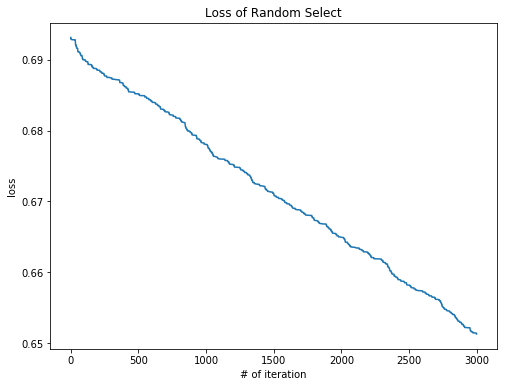

In [462]:
x = [i for i in range(len(cd1.loss))]
plt.figure(figsize = (8,6))
plt.plot(x, cd1.loss)
plt.xlabel('# of iteration')
plt.ylabel('loss')
plt.title('Loss of Random Select')
plt.show()

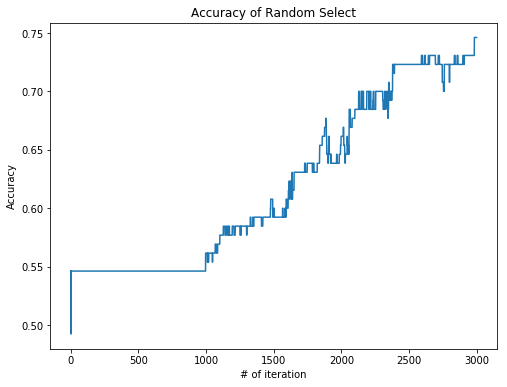

In [463]:
x = [i for i in range(len(cd1.acc))]
plt.figure(figsize = (8,6))
plt.plot(x, cd1.acc)
plt.xlabel('# of iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy of Random Select')
plt.show()

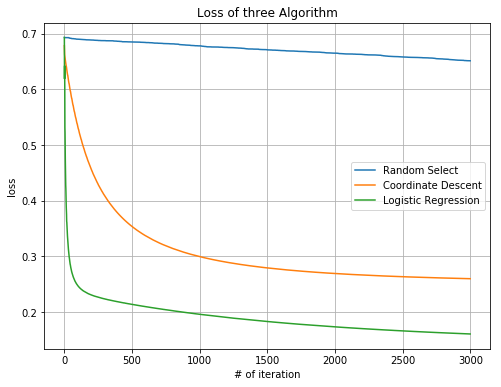

In [464]:
x = [i for i in range(len(cd1.loss))]
plt.figure(figsize = (8,6))
rsoss, = plt.plot(x, cd1.loss)
cdloss, = plt.plot(x, cd.loss)
lrloss, = plt.plot(x, losslogistic)
plt.legend([logloss, cdloss, lrloss], ['Random Select', 'Coordinate Descent', 'Logistic Regression'])
plt.grid(True)
plt.xlabel('# of iteration')
plt.ylabel('loss')
plt.title('Loss of three Algorithm')
plt.show()